In [7]:
# Utilities
from time import time
import itertools
import warnings

# Numerical calculation
import numpy as np
from scipy.stats import zscore

# Data handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.externals.six import StringIO  
from IPython.display import Image

# Sample and parameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

# Predictive Modeling
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

# Feature Engineering
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# Evaluation metrics
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
# Load the dataset into a Pandas dataframe called concrete
concrete = pd.read_csv('concrete.csv')

# Save an original copy of the dataframe
concrete_original = concrete.copy()

In [10]:
# Check the data
concrete.head()

cement    slag     ash   water  superplastic  coarseagg  fineagg  age  \
0 141.300 212.000   0.000 203.500         0.000    971.800  748.500   28   
1 168.900  42.200 124.300 158.300        10.800   1080.800  796.200   14   
2 250.000   0.000  95.700 187.400         5.500    956.900  861.200   28   
3 266.000 114.000   0.000 228.000         0.000    932.000  670.000   28   
4 154.800 183.400   0.000 193.300         9.100   1047.400  696.700   28   

   strength  
0    29.890  
1    23.510  
2    29.220  
3    45.850  
4    18.290

Deliverable -1 (Exploratory data quality report)
Univariate analysis:

Univariate analysis – data types and description of the independent attributes which should include name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

Multivariate analysis:
Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. 

Select the most appropriate attributes
Strategies to address the different data challenges such as data pollution, outliers and missing values
Inspect the Dataset
The dataset is divided into two parts, namely, feature matrix and the response vector.

Feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of dependent features. In above dataset, features are cement, slag, ash, water,superplastic, corrseagg, fineagg, age.
Response vector contains the value of Target variable(prediction or output) for each row of feature matrix. In above dataset, the target variable name is strength.

In [11]:
# Get the shape and size of the dataset
print("Number of rows    :",concrete.shape[0])
print("Number of columns :",concrete.shape[1])

Number of rows    : 1030
Number of columns : 9


In [12]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [13]:
# Describe the dataset with various other summary and statistics
concrete.describe().T

count    mean     std     min     25%     50%      75%  \
cement       1030.000 281.168 104.506 102.000 192.375 272.900  350.000   
slag         1030.000  73.896  86.279   0.000   0.000  22.000  142.950   
ash          1030.000  54.188  63.997   0.000   0.000   0.000  118.300   
water        1030.000 181.567  21.354 121.800 164.900 185.000  192.000   
superplastic 1030.000   6.205   5.974   0.000   0.000   6.400   10.200   
coarseagg    1030.000 972.919  77.754 801.000 932.000 968.000 1029.400   
fineagg      1030.000 773.580  80.176 594.000 730.950 779.500  824.000   
age          1030.000  45.662  63.170   1.000   7.000  28.000   56.000   
strength     1030.000  35.818  16.706   2.330  23.710  34.445   46.135   

                  max  
cement        540.000  
slag          359.400  
ash           200.100  
water         247.000  
superplastic   32.200  
coarseagg    1145.000  
fineagg       992.600  
age           365.000  
strength       82.600

Observations

The dataset comprises of 1030 rows and 9 columns
All the features are of numeric datatype (float or integer) including the strength.

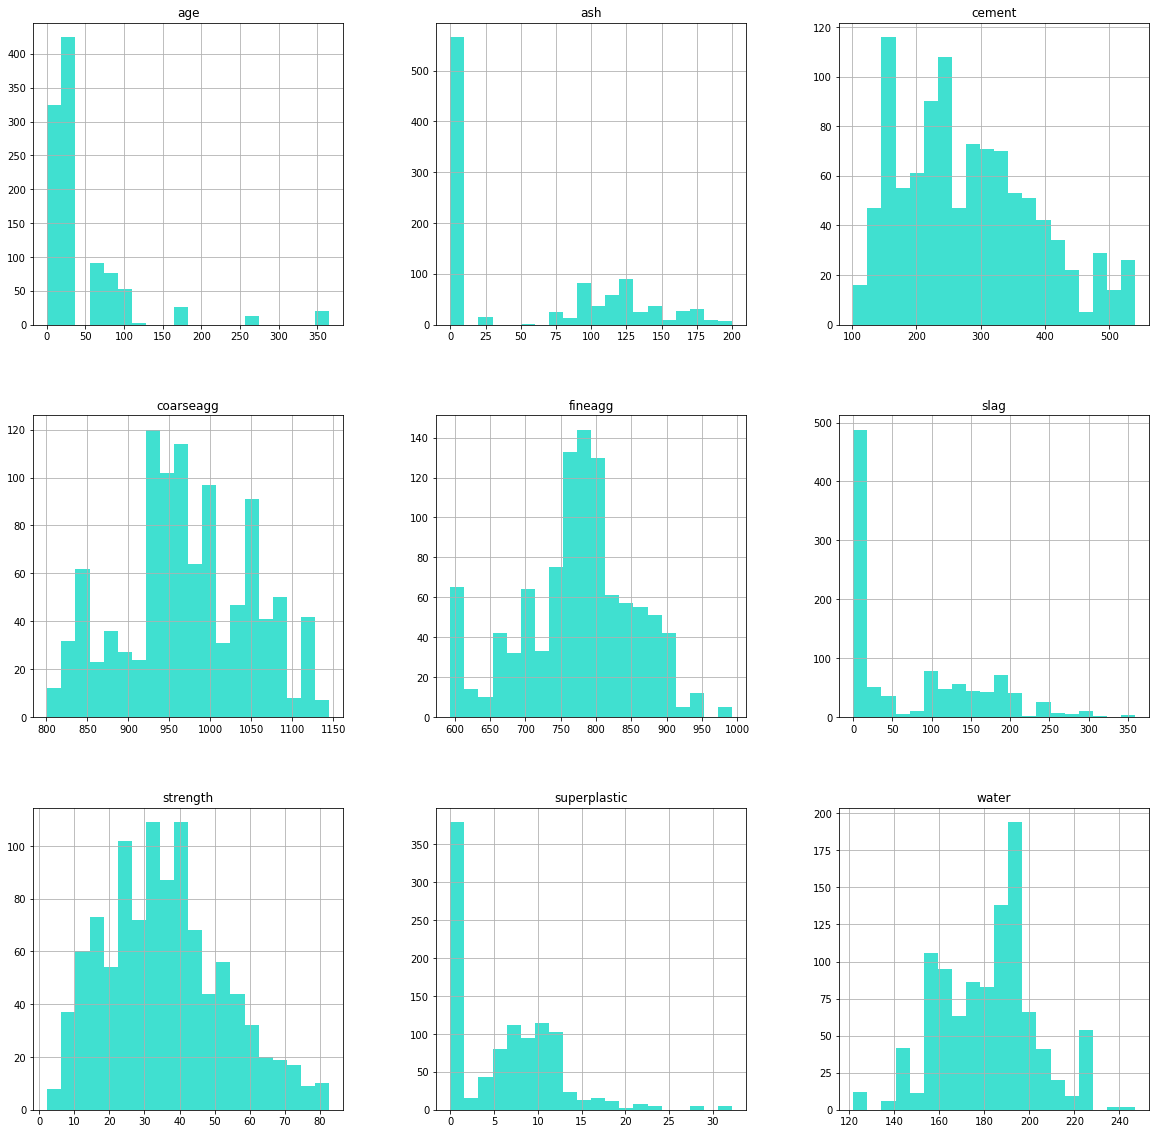

In [21]:
# Analyze the body of the distributions
_=concrete.hist(figsize=(20,20), bins=20, color='turquoise')

Observations:

The distribution of cement feature seems to be near normal. Rest all features posses skewed observation.
There are clearly 2 humps visible in slag, ash and superplastic features which has a higher density at 0. So these features must be having high 0s count. Hence our dataset is a mix of multiple clusters wrt to these 3 features.
Presence of long tails in slag, water, superplastic, fineagg and age indicates presence of outlier data point.
Data distribution of target column seems to be close to normal distribution.
Slight elongated tail for strength column indicates the presence of outlier.

In [22]:
# Find out the count of 0s in each column
(concrete == 0).sum(axis=0)

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

Observations:

There are huge number of 0s in slag, ash and superplastic column.
As per the discussion in the domain understanding section, slag, ash and superplastic are not the basic ingredients of concrete. Hence the observations in our dataset having 0s for these features are NO mistake. They do not represent NULL or missing values. In fact they are intentional. Hence we no longer require to do NULL treatment.

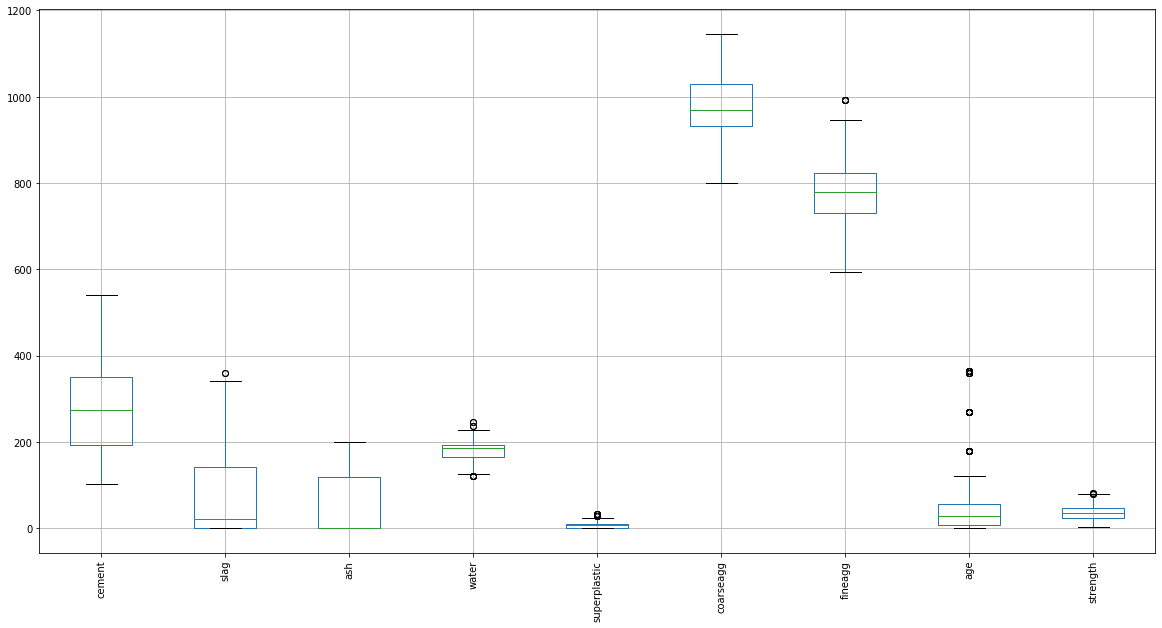

In [23]:
# Plot the central tendency of the dataset
_, bp = concrete.boxplot(return_type='both', figsize=(20,10), rot='vertical')

fliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
caps = [cap.get_ydata() for cap in bp['caps']]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

Observations:

There are 6 features (slag, water, superplastic, fineagg, age and strenghth) whose min and max values lie out side of the min_whis and max_whis boundary.
Also obvious from the central tendency and the box plots above, these features are having outliers in their distribution.

In [25]:
# Count the number of outlier data points present in each feature
for idx, col in enumerate(concrete.columns):
    print(col, '(%d)--' % len(fliers[idx]), fliers[idx])

cement (0)-- []
slag (2)-- [359.4 359.4]
ash (0)-- []
water (9)-- [121.8 121.8 121.8 121.8 121.8 247.  246.9 237.  236.7]
superplastic (10)-- [28.2 28.2 32.2 32.2 28.2 32.2 32.2 28.2 32.2 28.2]
coarseagg (0)-- []
fineagg (5)-- [992.6 992.6 992.6 992.6 992.6]
age (59)-- [180. 365. 180. 180. 180. 365. 180. 270. 180. 360. 365. 365. 180. 180.
 270. 270. 270. 270. 180. 180. 270. 360. 180. 360. 180. 365. 360. 365.
 365. 180. 270. 180. 180. 365. 180. 180. 270. 270. 180. 180. 365. 365.
 180. 365. 360. 180. 270. 180. 270. 180. 365. 360. 270. 365. 180. 180.
 365. 180. 270.]
strength (4)-- [81.75 79.99 82.6  80.2 ]


Outlier Treatement
Min/Max Replacement: Outliers from slag, water and fineagg features will be replaced by their nearest whisker ends in the central tendency. Means datapoints which are $1.5*IQR$ below the $Q_1$ will be replaced by min end of lower whisker and which are $1.5*IQR$ above the $Q_3$ will be replaced by max end of higher whisker.

NOTE:

There are 2 outlier data points in slag feature which are almost 17 units greater than 1.5*IQR. We will cap them using min/max replacement.
Water column has lower end outliers close to end of the lower whiskers but higher end outliers are more far from higher end whiskers. So we will be capping the upper end outliers.
The column Superplastic has outliers very close to whiskers end. So we will not be treating these fliers.
fineagg features has 5 fliers and they are almost 50 units away from 1.5*IQR. As the gap is quite big, we will use min/max replacement to cap them.
Age is a feature which to test for the comprehensive strength of a concrete, can be varied by a large spread of data. Different observations in age column are meant for allowing concrete to undergo rest for wide range of observations. So, we will not treat these outliers.
The fliers in the strength column lies very close to the end of the upper whisker (79.4). Hence we will not be considering these 4 points as outliers and will live with that.

In [26]:
# outliers capping for slag
q3 = concrete.slag.quantile(0.75)
high = q3 + 1.5*(q3 - concrete.slag.quantile(0.25))
concrete.loc[(concrete.slag > high), 'slag'] = caps[3][0]
# outliers capping for water
q3 = concrete.water.quantile(0.75)
high = q3 + 1.5*(q3 - concrete.water.quantile(0.25))
concrete.loc[(concrete.water > high), 'water'] = caps[7][0]
# outliers capping for fineagg
q3 = concrete.fineagg.quantile(0.75)
high = q3 + 1.5*(q3 - concrete.fineagg.quantile(0.25))
concrete.loc[(concrete.fineagg > high), 'fineagg'] = caps[13][0]

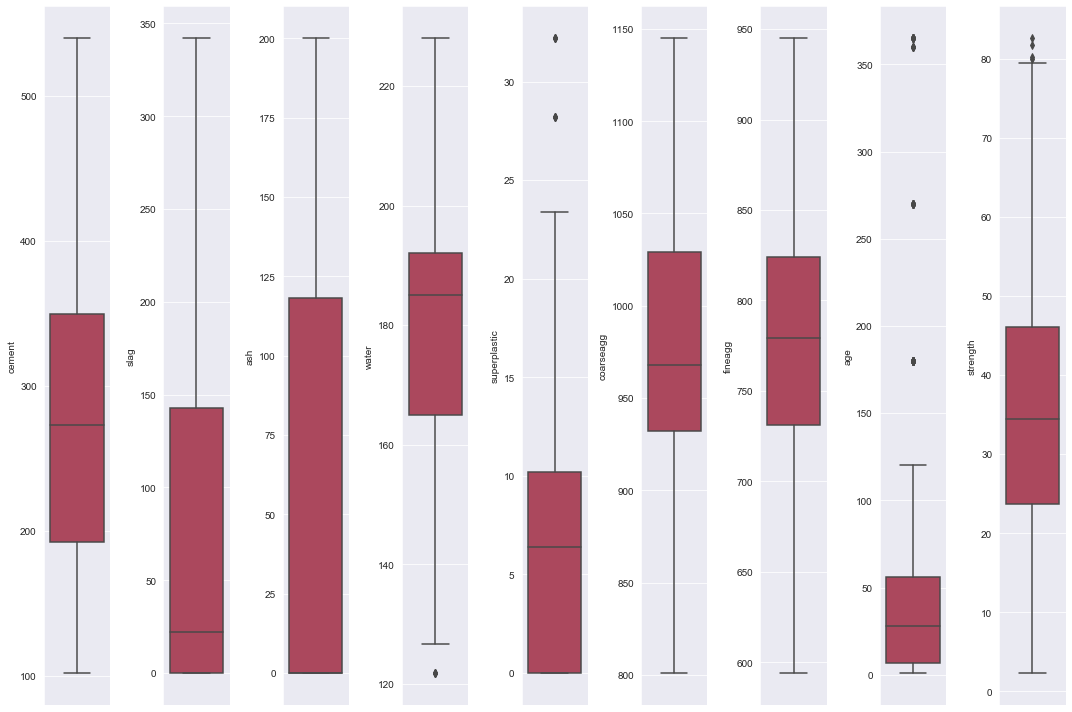

In [27]:
# Check the dataset after Outlier treatment
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
for idx, col in enumerate(concrete.columns):
    plt.subplot(1, len(concrete.columns), idx+1)
    sns.boxplot(y=concrete[col], palette='inferno')
plt.tight_layout()

Bivariate Analysis
Let's explore the relationship among the predictor variables and between the predictor variables and target column. We will be using the density curve plus histogram, scatterplot and pairplots for this analysis.

Pairplot
Pairplot helps picturizing the pair wise relationship between two variables. It creates a square matrix of no. of continous attributes of the dataset. The diagonal plots represents the histogram and/or the kde plot of a particular attributes where as the upper or lower trangular plots represents the co-linearity of two attributes.

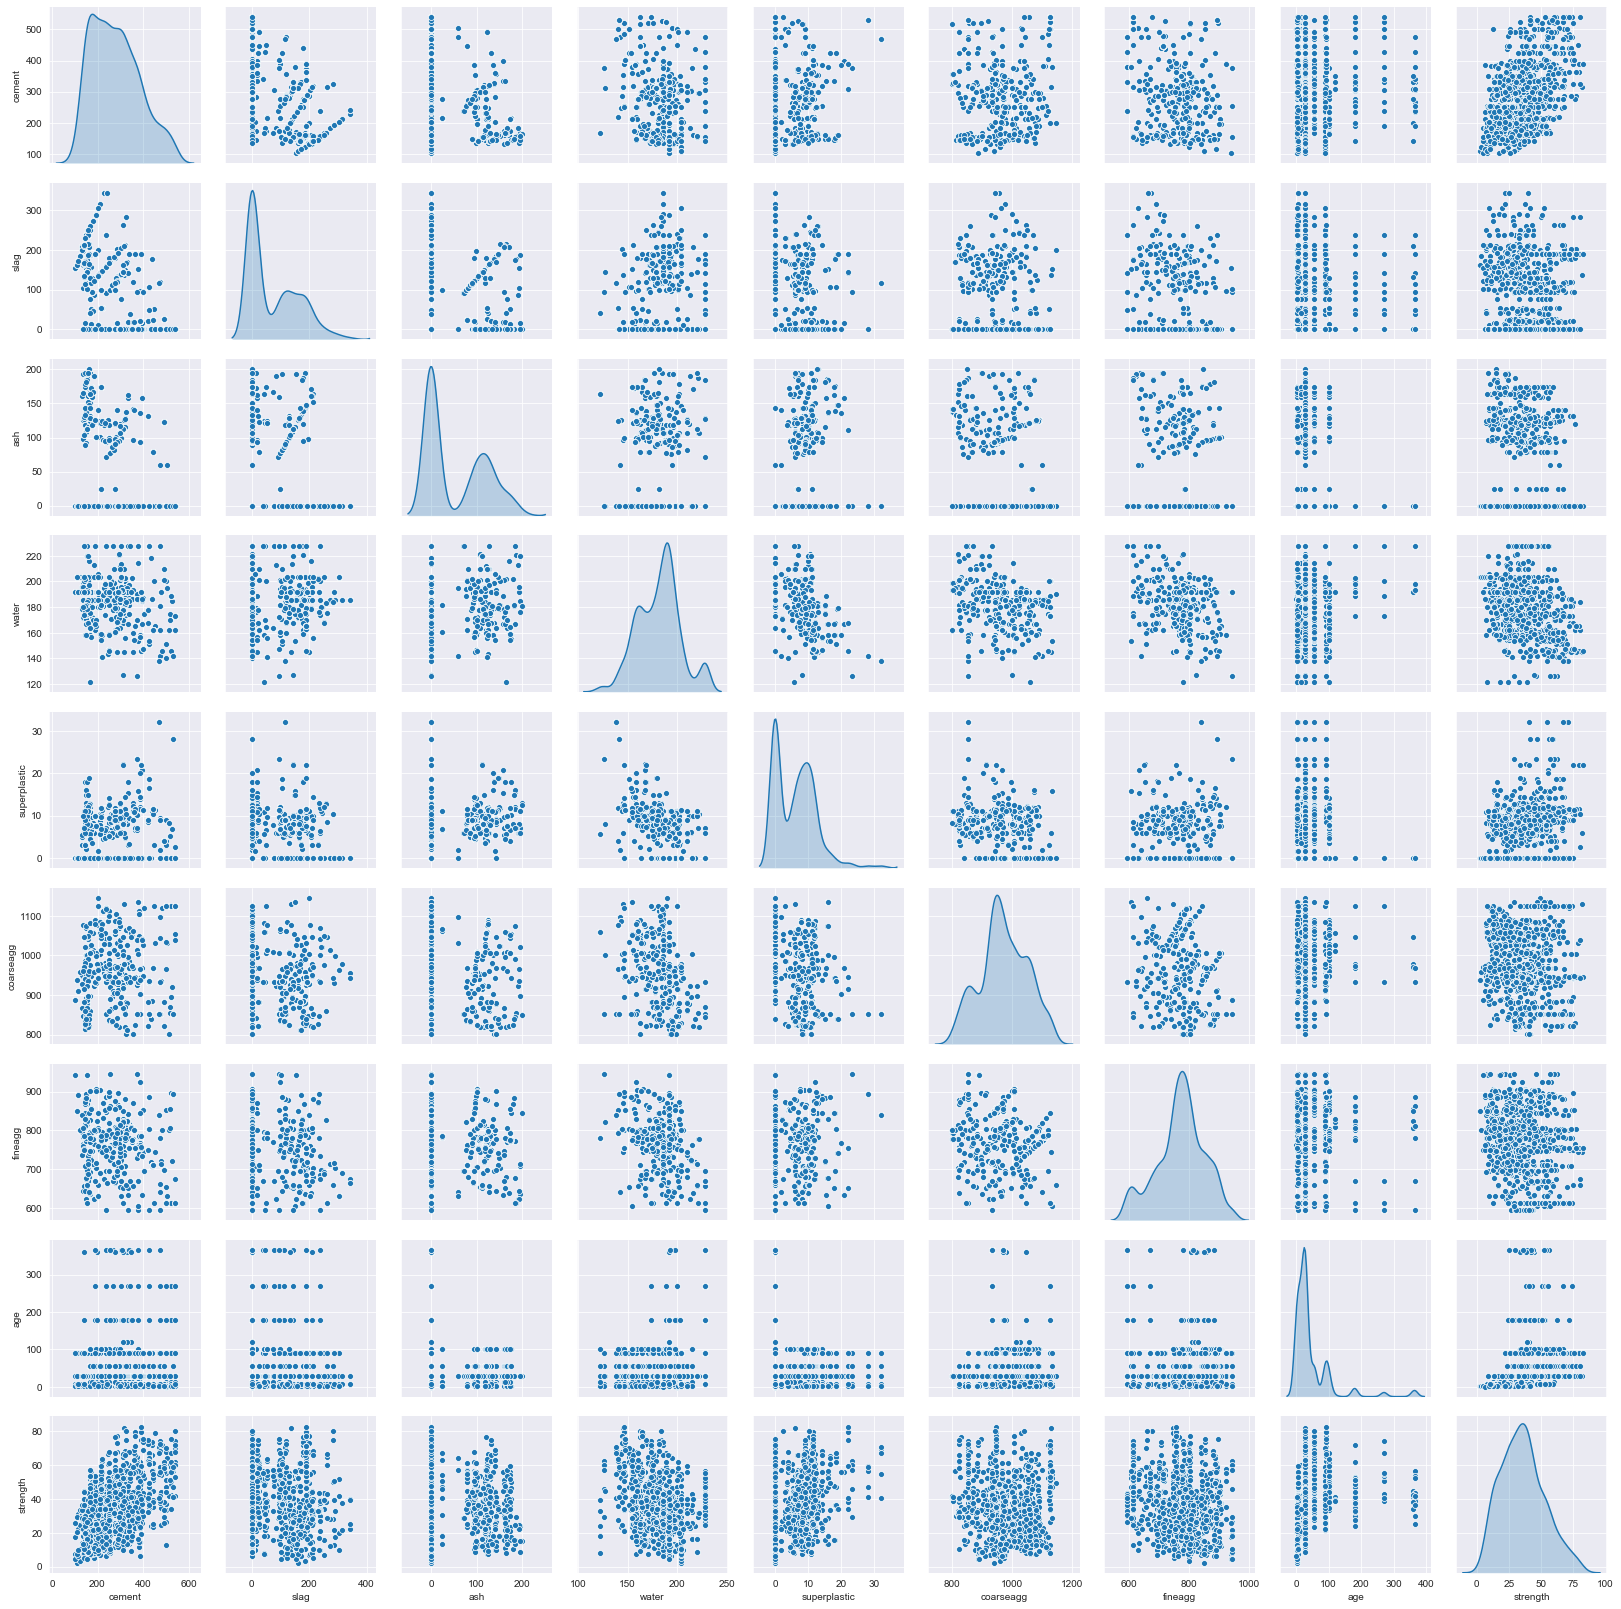

In [28]:
sns.pairplot(concrete, diag_kind='kde')

Observations:

All figures have a shape of scattered and cloud structures. This indicates there is very weak relationship of the independent variables among each other. Except for superplastic vs water which seems to be have a strong negative correlation.
strength has a rugby shaped scattered data points with cement, which indicates cement is a strong predictor for comprehensive strength compared to all other features.
Looking at the upper traingle for density plots also depicts the same. No density distibution is linearly associated with any other features except for cement vs strength.
As we have already discussed, slag, ash and superplastic have a huge volume of 0s in their distribution making them behave as 2 different clusters. So is also interpreted from density diagram where they have 2 clearly distinguished densities in each plot.
Parallel scatter plots and straight density plots of age across indicates it is a predictor which has the lowest relationship with any other features even with the target variable.

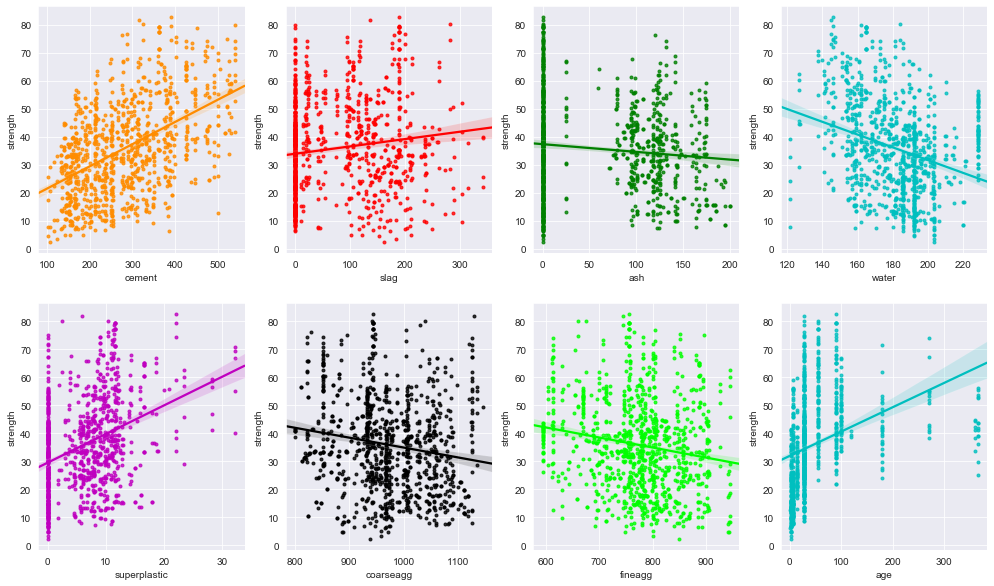

In [29]:
#Regression plot for Strength vs other predictors
# Analyze the regression line of each predictor vs strength
cols = [i for i in concrete.columns if i not in 'strength']
fig = plt.figure(figsize=(17,10))
for i,j,k in itertools.zip_longest(cols, range(len(cols)), ["darkorange","r","g","c","m","k","lime","c"]):
    plt.subplot(2,4,j+1)
    sns.regplot(i, 'strength', concrete, color=k, marker='.')

The regression line for cement, water, superplastic and age seems to have more or less same relationship with strength but let's plot the corelation matrix to get the pearson's correlation coefficient for them.

Text(0.5, 1, 'Correlation between variables')

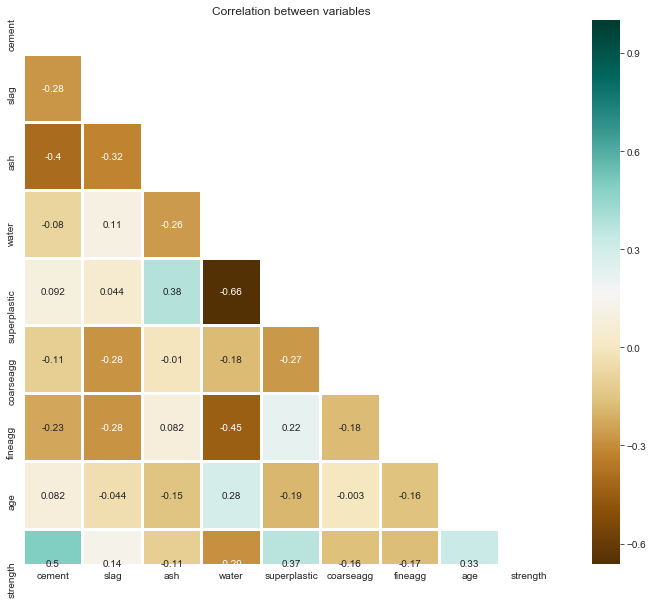

In [30]:
# Visualize the correlation matrix
corr = concrete.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
with sns.axes_style("white"):
    sns.heatmap(corr,annot=True,linewidth=2, mask=mask, cmap="BrBG")
plt.title("Correlation between variables")

Observation:

The correlation matrix has almost all the cells marked with light shades which indicates the pearson's correlation coeficient for those cells are close to 0. Which means variables are not much corelated with each other.
cement vs strength shows the coefficient to be 0.5 and the water vs superplastic to be -0.66, the highest among all.

Deliverable -2 (Feature Engineering)
Identify opportunities (if any) to create a composite feature, drop a feature.
Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help
Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength
Feature Generation
Feature Generation is the technique of Feature engineering which deals with raw data to generate additional features which can describe higher degree of relationship with target variable.

Composite Feature:
Let's analyze the relationship of some composite features with compressive strength. Features like water to cement ratio, aggreagets to cement ratio etc. Remember feature cement only has 0.5 pearson's correlation coeficient with strength. Let's analyze if any composite feature is even more strong predictor of compressive strength.

In [31]:
# Feature 1 - Water to Cement ratio
np.corrcoef(x=concrete.cement/concrete.water, y=concrete.strength)

array([[1.        , 0.55959384],
       [0.55959384, 1.        ]])

In [32]:
# Feature 2 - Cement to Coarse Aggregate ratio
np.corrcoef(x=concrete.cement/concrete.coarseagg, y=concrete.strength)

array([[1.        , 0.51180066],
       [0.51180066, 1.        ]])

In [33]:
# Feature 3 - Cement to Fine Aggregate ratio
np.corrcoef(x=concrete.cement/concrete.fineagg, y=concrete.strength)

array([[1.        , 0.47841247],
       [0.47841247, 1.        ]])

In [34]:
# Feature 4 - Cement to Aggregates ratio
np.corrcoef(x=concrete.cement/(concrete.coarseagg+concrete.fineagg), y=concrete.strength)

array([[1.        , 0.50949154],
       [0.50949154, 1.        ]])

In [35]:
# Feature 5 - Admixtures to Cement ratio
np.corrcoef(x=(concrete.superplastic + concrete.slag + concrete.ash)/concrete.cement, y=concrete.strength)

array([[ 1.        , -0.16341629],
       [-0.16341629,  1.        ]])

Observations:

Out of 5 composite features, upon arranging them in descending order of their correlation coefficient
Water:Cement: 0.55
Cement:CoarseAggregate: 0.51
Cement:Aggregates: 0.50
Cement:FineAggregate: 0.47
Admictures:Cement: 0.16 (negative)
None of the above composite features are proven to be a strong predictor of compressive strength.
Only Water to Cement ratio has a very little bit (0.05) greater correlation coefficient than Cement alone. This composite feature is also not a very strong predictor of strength. For just 0.05 increase in correlation coefficient, we will not increase the dimension of mathematical space.
Also if there is a need to combine more than 2 features to make a new composite features out of it, let's leave it to Linear family algorithms to get this job done.
Hence we are not getting any strong correlationship out of any composite features with strength, let's go ahead and explore Polynomial features.

Polynomial Feature: Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. Let's generate polynomial feature of $2^{nd}$ degree with interaction only feature.

In [36]:
# Instantiate an poly object with 2nd degree
poly = PolynomialFeatures(degree=2, interaction_only=True)

In [37]:
# Fit and transform the X or input features
concrete_poly = poly.fit_transform(concrete.drop('strength', axis=1))

In [38]:
# Get the shape of the newly generated features
print("Number of rows    :",concrete_poly.shape[0])
print("Number of columns :",concrete_poly.shape[1])

Number of rows    : 1030
Number of columns : 37


Observation:

37 dimensions are created out of 8 original dimensions.

In [39]:
# Join the strength column to create a polynomial dataset
concrete_poly = pd.DataFrame(concrete_poly,columns=poly.get_feature_names())
concrete_poly['strength'] = concrete['strength']
concrete_poly.shape

(1030, 38)

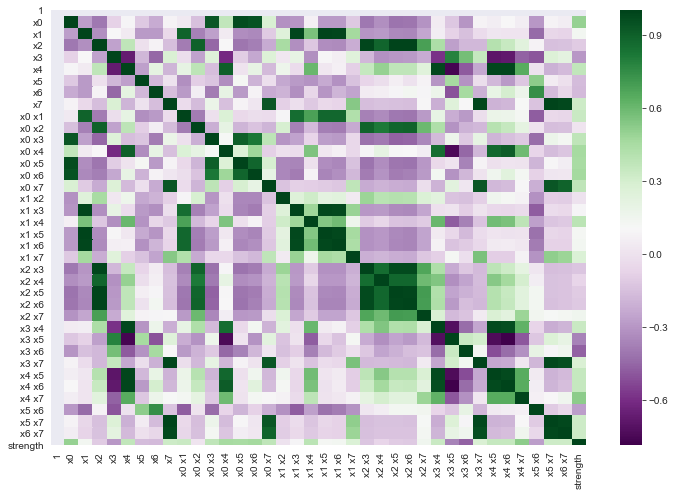

In [40]:
# Visualize the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(concrete_poly.corr(), cmap="PRGn")

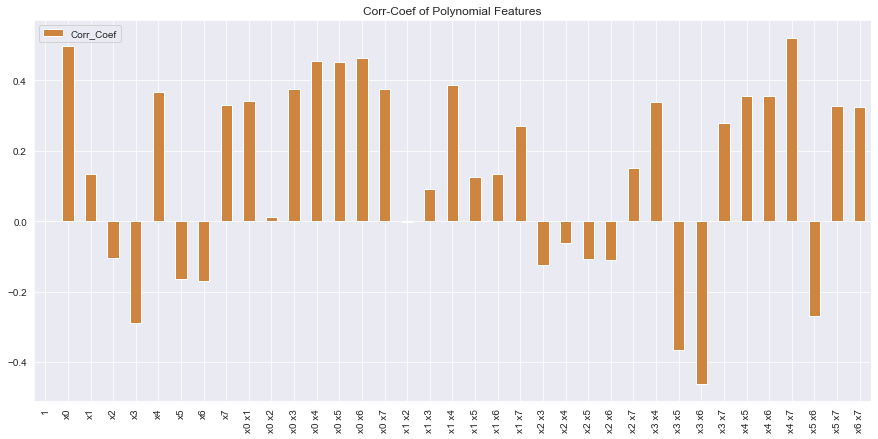

In [41]:
# Check the correlation coefficient of all the polynomial features with strength
poly_corrcoef = [np.corrcoef(concrete_poly[col], concrete_poly.strength)[0,1] for col in concrete_poly.columns[:-1]]
pd.DataFrame(poly_corrcoef, index = concrete_poly.columns[:-1], 
             columns=['Corr_Coef']).plot(kind='bar', figsize=(15,7), title='Corr-Coef of Polynomial Features', color='peru')

Observations:

Strength row/column in the heatmap has all the blocks light shaded as well as the whole polynomial features dataset has a greater area light shaded. In the cmap indicator bar, the light shade area represent 0 or close to 0. So this polynomial features dataset has very less correlationship coming out among all 37 features and with the strength column.
The bar plot for correlation coefficient of all polynomial features with strength indicates NO newly generated features are a very good strong predictor for compressive strength. All have a coefficient less than or close to 0.5, which anyway only cement feature has with strength.
We will not be increasing the sparsity of the dataset by incrementing to such a large dimensional mathematical space for NO considerable increase in the correlationship. Hence we will not be considering polynomial features to feed to our model.

Feature Selection
Feature Selection is the technique of Feature engineering which analyzes the feature space to squeze out all the information to explain as much as variance it can there by getting rid of few unrelated dimensions.

Standardization
Standardization with z-scores is the most commonly used method. It converts all indicators to a common scale with an average/mean of 0 and standard deviation of 1. As most of the features in our dataset have units Kg/m3 and age and strength have days and MPa as the units of measurements respectively, we apply z-score to convert them into a single scale.

In [42]:
concrete = concrete.apply(zscore)
concrete.describe()

cement     slag      ash    water  superplastic  coarseagg  fineagg  \
count 1030.000 1030.000 1030.000 1030.000      1030.000   1030.000 1030.000   
mean    -0.000    0.000    0.000   -0.000         0.000      0.000   -0.000   
std      1.000    1.000    1.000    1.000         1.000      1.000    1.000   
min     -1.715   -0.858   -0.847   -2.816        -1.039     -2.212   -2.254   
25%     -0.850   -0.858   -0.847   -0.783        -1.039     -0.527   -0.533   
50%     -0.079   -0.602   -0.847    0.164         0.033     -0.063    0.077   
75%      0.659    0.802    1.002    0.495         0.669      0.727    0.637   
max      2.478    3.114    2.281    2.192         4.354      2.214    2.157   

           age  strength  
count 1030.000  1030.000  
mean     0.000    -0.000  
std      1.000     1.000  
min     -0.707    -2.006  
25%     -0.612    -0.725  
50%     -0.280    -0.082  
75%      0.164     0.618  
max      5.058     2.802

Principal Component Analysis:
Principal Component Analysis (PCA) uses "orthogonal linear transformation" to introduces a lower-dimensional representation of the dataset. It finds a sequence of linear combination of the variables called the principal components that explain the maximum variance and summarize the most information in the data and are mutually uncorrelated with each other. PCA allows us to quantify the trade-offs between the number of features we utilize and the total variance explained by the data. Let's analyze PCA to find out no of features which can explain more than 97% of cumulative variance.

In [43]:
# Create a covariance matrix and calculate eigen values
pca = PCA().fit(concrete.drop('strength', axis=1))
# calculate variance ratios
var = pca.explained_variance_ratio_;var

array([0.28521562, 0.1770492 , 0.16746411, 0.12683569, 0.11910269,
       0.09852794, 0.02200866, 0.00379609])

In [44]:
# cumulative sum of variance explained with [n] features
eigen_vals = np.round(pca.explained_variance_ratio_, decimals=3)*100
np.cumsum(eigen_vals)

array([ 28.5,  46.2,  62.9,  75.6,  87.5,  97.4,  99.6, 100. ])

In [46]:
#Scree Plot
threshold=97
def generate_scree_plot(covar_matrix, threshold):
    var = covar_matrix.explained_variance_
    eigen_vals = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    f.suptitle('PCA Scree plot')

    ax1.plot(np.arange(1, len(var)+1), var, '-go')
    ax1.set_xticks(np.arange(1, len(var)+1))
    ax1.set_title('Explained Variance')
    ax1.set_xlabel('# of Components')
    ax1.set_ylabel('Eigen Values')

    ax2.plot(np.arange(1, len(eigen_vals)+1), eigen_vals, ':k', marker='o', markerfacecolor='red', markersize=8)
    ax2.set_xticks(np.arange(1, len(eigen_vals)+1))
    ax2.axhline(y=threshold, color='r', linestyle=':', label='Threshold(95%)')
    ax2.legend()
    ax2.plot(np.arange(sum(eigen_vals <= threshold) + 1, len(eigen_vals) + 1), 
             [val for val in eigen_vals if val > threshold], '-bo')
    ax2.set_title('Cumulative sum Explained Variance Ratio')
    ax2.set_xlabel('# of Components')
    ax2.set_ylabel('% Variance Explained')

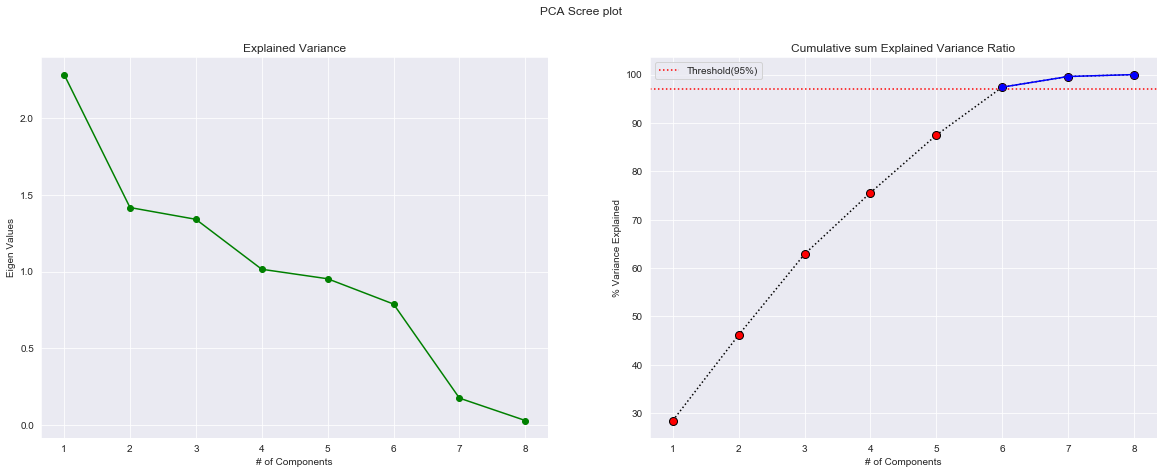

In [48]:
generate_scree_plot(pca, threshold=threshold)

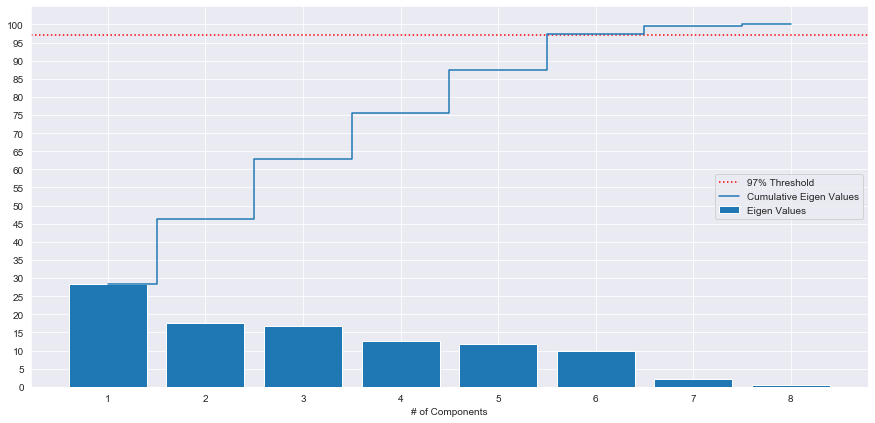

In [47]:
#Cumulative Eigen Plot
plt.figure(figsize=(15,7))
plt.axhline(y=threshold, color='r', linestyle=':', label='97% Threshold')
plt.bar(np.arange(1, len(eigen_vals) + 1), eigen_vals, label='Eigen Values')
plt.plot(np.arange(1, len(np.cumsum(eigen_vals))+1), np.cumsum(eigen_vals), 
         drawstyle='steps-mid', label='Cumulative Eigen Values')
plt.yticks(np.arange(0,105,5))
_, _ = plt.xticks(np.arange(1,9,1)), plt.xlabel('# of Components')
plt.legend()

Observations:

There are 6 features which explains more than 97% of variance cumulatively in the dataset

In [49]:
# Create a new matrix using the n components
X = concrete.drop('strength', axis=1)
X_proj = PCA(n_components=6).fit_transform(X)
y = concrete.strength
X_proj.shape

(1030, 6)

Train Test Split

Divide both the original and PCA projected datasets into 80:20 ratio for train and test respectively.

In [50]:
# Divide the original and the projected dataset into 80:20 ration for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_proj_train, X_proj_test, y_train, y_test = train_test_split(X_proj, y, test_size=0.2, random_state=1)

print('Original dimensions for train test split:\n', X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('\nProjected dimensions for train test split:\n', X_proj_train.shape, X_proj_test.shape, y_train.shape, y_test.shape)

Original dimensions for train test split:
 (824, 8) (206, 8) (824,) (206,)

Projected dimensions for train test split:
 (824, 6) (206, 6) (824,) (206,)


In [51]:
#Linear Models
#LinearRegression (Original Dataset)
# Fit the LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# Print the coefficients of each attributes
lr.coef_

array([ 0.80069269,  0.57885401,  0.36540177, -0.15066973,  0.10409791,
        0.1174407 ,  0.16964038,  0.42844968])

In [53]:
# Calculate the score of Linear Regression
print('Training score  :', lr.score(X_train, y_train))
print('Testing score   :', lr.score(X_test, y_test))

Training score  : 0.6103583166501315
Testing score   : 0.6337440578548982


In [54]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

Root Mean Squared Error (RMSE): 0.6219528293892684


In [55]:
# Calculate Cross Validation Score
lr_cv = cross_val_score(lr, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",lr_cv.mean())
print ("cv-std  :",lr_cv.std())
print ("cv-max  :",lr_cv.max())
print ("cv-min  :",lr_cv.min())

cv-mean : -0.4072572391525986
cv-std  : 0.17404400413872123
cv-max  : -0.176668180154457
cv-min  : -0.8069791308204513


Text(0, 0.5, 'values')

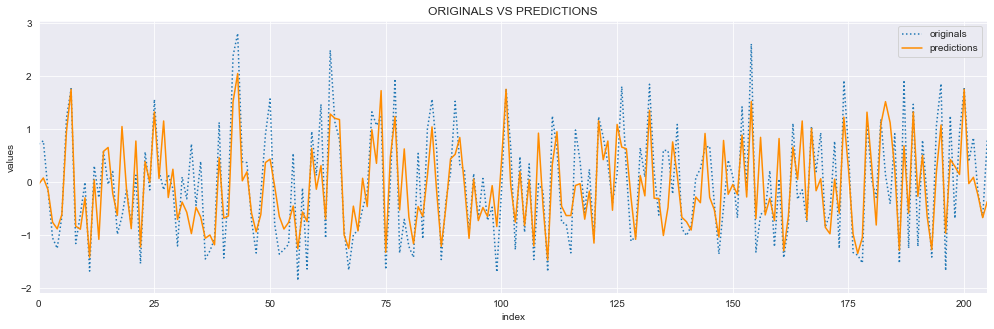

In [56]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(lr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='darkorange')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

In [57]:
##LinearRegression (PCA projected Dataset)
# Fit the LinearRegression
lr_proj = LinearRegression()
lr_proj.fit(X_proj_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Print the coefficients of each attributes
lr_proj.coef_

array([-3.15538429e-02,  1.45333453e-01,  4.76493963e-01,  9.45583915e-05,
        2.97625638e-01,  3.88217556e-01])

In [59]:
# Calculate the score of Linear Regression
print('Training score  :', lr_proj.score(X_proj_train, y_train))
print('Testing score   :', lr_proj.score(X_proj_test, y_test))

Training score  : 0.5523710313802284
Testing score   : 0.603985397243481


In [60]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, lr_proj.predict(X_proj_test))))

Root Mean Squared Error (RMSE): 0.6467265768662404


In [61]:
# Calculate Cross Validation Score
lr_proj_cv = cross_val_score(lr_proj, X_proj_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",lr_proj_cv.mean())
print ("cv-std  :",lr_proj_cv.std())
print ("cv-max  :",lr_proj_cv.max())
print ("cv-min  :",lr_proj_cv.min())

cv-mean : -0.43193489735119994
cv-std  : 0.17770867053232187
cv-max  : -0.13640259606042562
cv-min  : -0.8539212131428309


Text(0, 0.5, 'values')

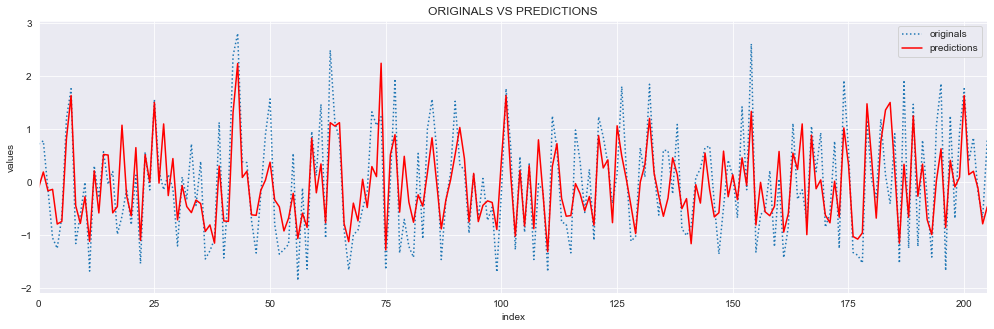

In [62]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(lr_proj.predict(X_proj_test)).plot(label = "predictions",figsize=(17,5),color='r')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

Observations:

Linear Regression gives very poor result for both original and PCA projected dataset.
Mean $R^2$ cross validation score is not at all promising for Linear model.

In [63]:
##Regularised Linear Model
##Ridge Regression (Original Dataset)
# Fit the Ridge regularised linear model
rg = Ridge(alpha=0.1)
rg.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
# Print the coefficients of each attributes
rg.coef_

array([ 0.79915258,  0.57734526,  0.3640597 , -0.15172704,  0.10407029,
        0.11639858,  0.16828587,  0.42832932])

In [65]:
# Calculate the score of Linear Regression
print('Training score  :', rg.score(X_train, y_train))
print('Testing score   :', rg.score(X_test, y_test))

Training score  : 0.6103579676896538
Testing score   : 0.6338320854847431


In [66]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, rg.predict(X_test))))

Root Mean Squared Error (RMSE): 0.621878083402651


In [67]:
# Calculate Cross Validation Score
rg_cv = cross_val_score(rg, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",rg_cv.mean())
print ("cv-std  :",rg_cv.std())
print ("cv-max  :",rg_cv.max())
print ("cv-min  :",rg_cv.min())

cv-mean : -0.40701320251073003
cv-std  : 0.17371424097112007
cv-max  : -0.17704006114535317
cv-min  : -0.8058938522678567


Text(0, 0.5, 'values')

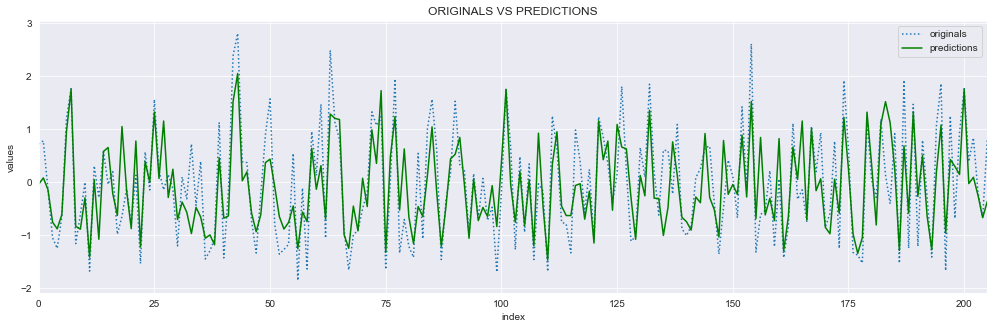

In [68]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(rg.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='g')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

In [69]:
##Ridge Regression (PCA projected Dataset)
# Fit the Ridge regularised linear model
rg_proj = Ridge(alpha=0.1)
rg_proj.fit(X_proj_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [70]:
# Print the coefficients of each attributes
rg_proj.coef_

array([-3.15501718e-02,  1.45320063e-01,  4.76452066e-01,  9.35901674e-05,
        2.97586562e-01,  3.88158606e-01])

In [71]:
# Calculate the score of Linear Regression
print('Training score  :', rg_proj.score(X_proj_train, y_train))
print('Testing score   :', rg_proj.score(X_proj_test, y_test))

Training score  : 0.5523710244182392
Testing score   : 0.6039707227528059


In [72]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, rg_proj.predict(X_proj_test))))

Root Mean Squared Error (RMSE): 0.6467385591203536


In [73]:
# Calculate Cross Validation Score
rg_proj_cv = cross_val_score(rg_proj, X_proj_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",rg_proj_cv.mean())
print ("cv-std  :",rg_proj_cv.std())
print ("cv-max  :",rg_proj_cv.max())
print ("cv-min  :",rg_proj_cv.min())

cv-mean : -0.4318711867507329
cv-std  : 0.17756065721426312
cv-max  : -0.1364869201005567
cv-min  : -0.8526147108788857


Text(0, 0.5, 'values')

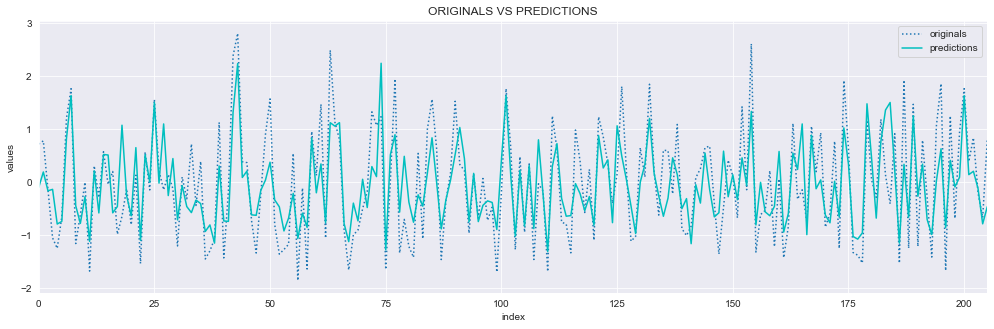

In [74]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(rg_proj.predict(X_proj_test)).plot(label = "predictions",figsize=(17,5),color='c')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

In [75]:
##Lasso Regression (Original Dataset)
# Fit the Lasso regularised linear model
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
# Print the coefficients of each attributes
ls.coef_

array([ 0.3938138 ,  0.15413176,  0.        , -0.13662698,  0.1690535 ,
       -0.        , -0.        ,  0.2685882 ])

In [77]:
# Calculate the score of Linear Regression
print('Training score  :', ls.score(X_train, y_train))
print('Testing score   :', ls.score(X_test, y_test))

Training score  : 0.5245177483979858
Testing score   : 0.5208281427757153


In [78]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, ls.predict(X_test))))

Root Mean Squared Error (RMSE): 0.7113949201365292


In [79]:
# Calculate Cross Validation Score
ls_cv = cross_val_score(ls, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",ls_cv.mean())
print ("cv-std  :",ls_cv.std())
print ("cv-max  :",ls_cv.max())
print ("cv-min  :",ls_cv.min())

cv-mean : -0.48139838769146126
cv-std  : 0.18519185898154916
cv-max  : -0.2230960260643361
cv-min  : -0.8682125030409541


Text(0, 0.5, 'values')

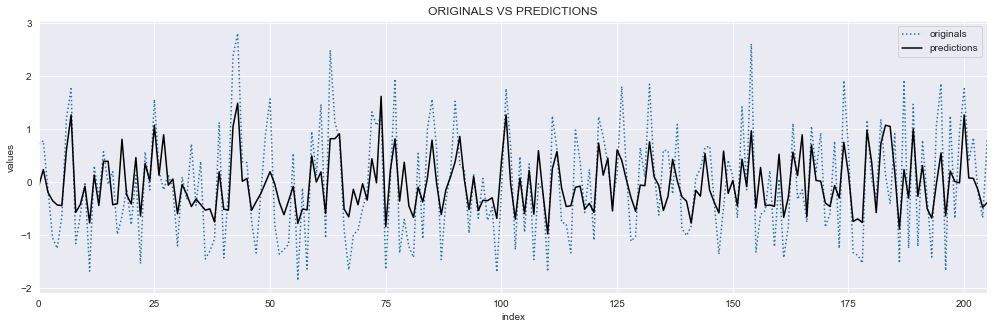

In [80]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(ls.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='k')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

In [81]:
##Lasso Regression (PCA projected Dataset)
# Fit the Lasso regularised linear model
ls_proj = Lasso(alpha=0.1)
ls_proj.fit(X_proj_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
# Print the coefficients of each attributes
ls_proj.coef_

array([-0.        ,  0.07406012,  0.40203022, -0.        ,  0.1884781 ,
        0.26200721])

In [83]:
# Calculate the score of Linear Regression
print('Training score  :', ls_proj.score(X_proj_train, y_train))
print('Testing score   :', ls_proj.score(X_proj_test, y_test))

Training score  : 0.5115990645549109
Testing score   : 0.5195434052473069


In [84]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, ls_proj.predict(X_proj_test))))

Root Mean Squared Error (RMSE): 0.7123479643748389


In [85]:
# Calculate Cross Validation Score
ls_proj_cv = cross_val_score(ls_proj, X_proj_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",ls_proj_cv.mean())
print ("cv-std  :",ls_proj_cv.std())
print ("cv-max  :",ls_proj_cv.max())
print ("cv-min  :",ls_proj_cv.min())

cv-mean : -0.45524243253575136
cv-std  : 0.17732552794928705
cv-max  : -0.20052803371931516
cv-min  : -0.8246837820337672


Text(0, 0.5, 'values')

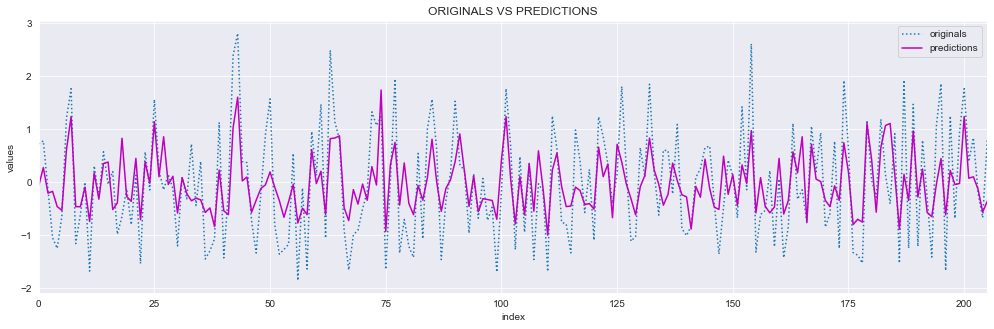

In [86]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(ls_proj.predict(X_proj_test)).plot(label = "predictions",figsize=(17,5),color='m')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

Observations:

Both Ridge and Lasso performed very poorly in terms of training and test scores. The mean $R^2$ cross validation scores are also very low for both of them on both original and PCA projected dataset.
None of the scatter plots are close to look like a regressor line. They are having much more variances among predicted and actual data.
So, Neither Ridge nor Lasso regularized linear models are able to predict the compressive strength of the cement with an acceptable accuracy.
Hence, to conclude, this problem of determining the compressive strength of concrete based on it's ingredients quantity, as a whole, doesn't belong to a problem that can be addressed by any Linear family algorithms. The model complexity required is of non-parametric.

We have noticed few of the features in the dataset posses a distribution with mix of multiple gaussians in the bi-variate analysis section. Let's apply clustering technique to find if there are any distiguished clusters and their suitability in compressive strength prediction.

K-Means Clustering
Optimized Intertia - Elbow Analysis
The technique used to find out the optimized k value. There are 2 gaussians present in each of the 3 features (slag, ash and superplastic) is what we observed in the pairplot. Hence we will analyze more the data for more than 6, let's take 14 clusters.

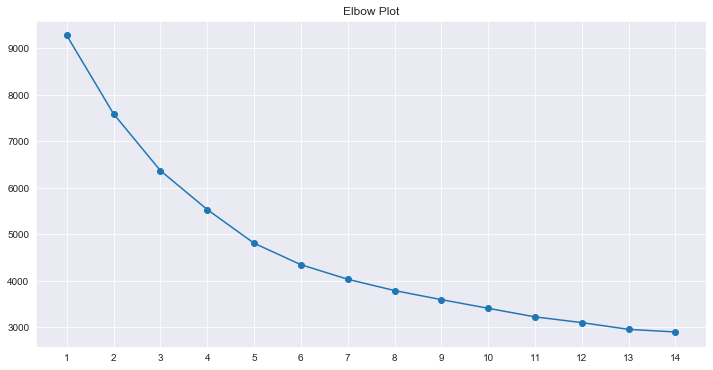

In [87]:
k_range = range(1,15)
kmeans = [KMeans(n_clusters=n) for n in k_range]
sse = [kmeans[i].fit(concrete).inertia_ for i in range(len(kmeans))]
plt.figure(figsize=(12,6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Plot')
_ = plt.xticks(k_range)

Observations:

NO stip descent is observed in the Elbow Analysis plot. The decrease in sum of sqaured errors are pretty much smooth there by making it difficult to find out an optimed no. of cluster.
So we will go by our intuation from pairplot to consider 6 clusters and analyze the suitablity of prediction.

In [88]:
# Initialize 6 centroid clusters and fit the dataset
kmeans = KMeans(n_clusters= 6, random_state=1)
kmeans.fit(concrete)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

Text(0, 0.5, 'Bin Counts')

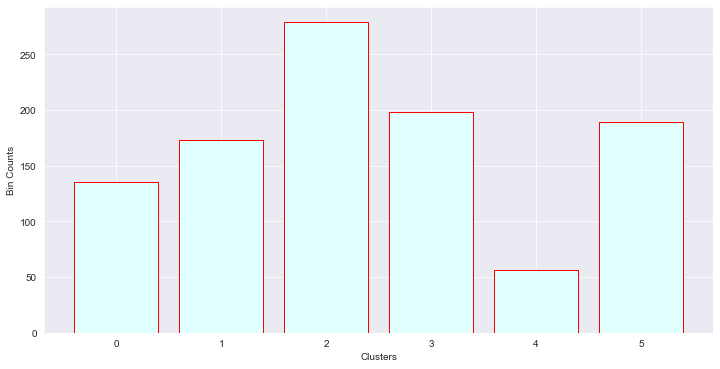

In [89]:
# Find out the count of observations in each clusters
labels = kmeans.labels_
plt.figure(figsize=(12,6))
plt.bar(np.unique(labels), np.bincount(labels), color='lightcyan', edgecolor='red')
plt.xlabel('Clusters')
plt.ylabel('Bin Counts')

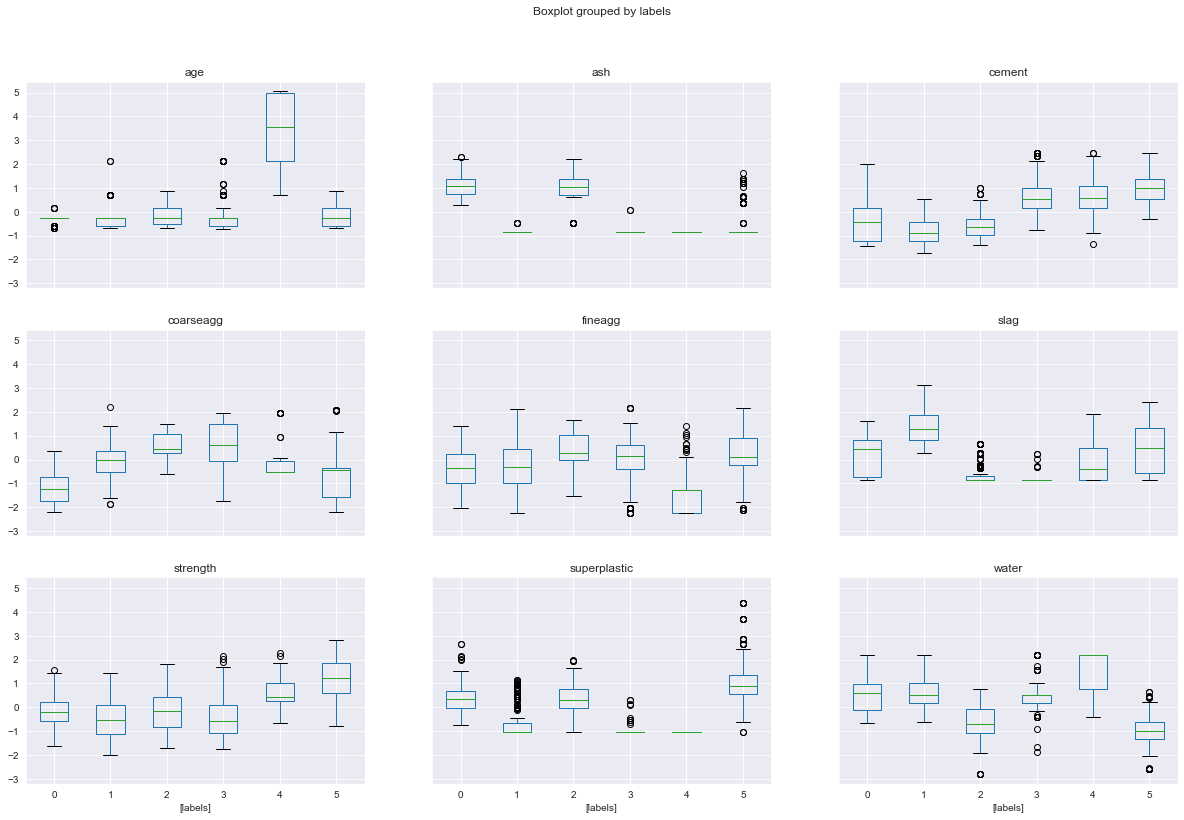

In [90]:
## Creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(labels , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
# Join the labels with original dataset 
concrete_labeled = concrete.join(cluster_labels)
_ = concrete_labeled.boxplot(by='labels', layout=(3,3), figsize=(20,13))

Observations:

NO distinct clusters are visible at any feature space. Looks like the attributes are weak predictors except for cement.
The potential of getting better results by breaking data into clusters is unlikely to give the desired result. Hence we will discard the clustering approach and proceed with non-parametric models.

Deliverable - 3 (create the model)
Obtain feature importance for the individual features using multiple methods and present your findings.

We will analyze the following non-parametric models and check the accuracy scores with each one of them.

Support Vector Regressor
Decision Tree Regressor
From Ensemble family:

Random Forest Regressor
Bagging Regressor
Gradient Boosting Regressor
Support Vector Regressor
Iteration 1 - Linear Kernel

In [91]:
svr = SVR(C=1, kernel='linear')
svr.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [92]:
# Calculate the score of Support Vector Regressor
print('Training score  :', svr.score(X_train, y_train))
print('Testing score   :', svr.score(X_test, y_test))

Training score  : 0.5913332414888823
Testing score   : 0.6176545946162738


In [93]:
##Iteration 2 - RBF kernel(default)
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [94]:
# Calculate the score of Support Vector Regressor
print('Training score  :', svr.score(X_train, y_train))
print('Testing score   :', svr.score(X_test, y_test))

Training score  : 0.8784490376802108
Testing score   : 0.8471201443604098


In [95]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, svr.predict(X_test))))

Root Mean Squared Error (RMSE): 0.40182804102293873


In [96]:
# Calculate Cross Validation Score
svr_cv = cross_val_score(svr, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",svr_cv.mean())
print ("cv-std  :",svr_cv.std())
print ("cv-max  :",svr_cv.max())
print ("cv-min  :",svr_cv.min())

cv-mean : -0.257709540552784
cv-std  : 0.1360624411126876
cv-max  : -0.09799265983304076
cv-min  : -0.5571347535770865


Text(0, 0.5, 'values')

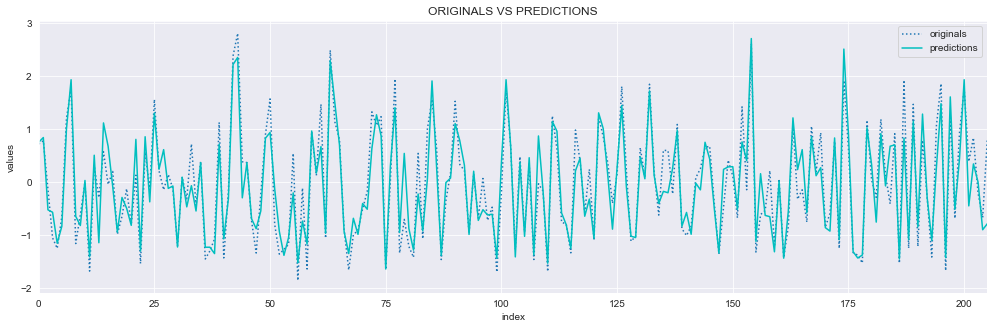

In [97]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(svr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='c')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

Observations:

The performance of Support Vector Regressor with linear kernel is almost similar with Linear models.
In second iteration it is performing better than Linear models. Though this is not regularized, it is giving almost acceptable result with its default hyperparameters (C=1, kernel='rbf').

Decision Tree Regressor
Iteration 1 - Unpruned tree

In [98]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [99]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', dtr.score(X_train, y_train))
print('Testing score   :', dtr.score(X_test, y_test))

Training score  : 0.9954299427163225
Testing score   : 0.8581148798958993


In [100]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, dtr.predict(X_test))))

Root Mean Squared Error (RMSE): 0.38710923687855


In [101]:
# Calculate Cross Validation Score
dtr_cv = cross_val_score(dtr, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",dtr_cv.mean())
print ("cv-std  :",dtr_cv.std())
print ("cv-max  :",dtr_cv.max())
print ("cv-min  :",dtr_cv.min())

cv-mean : -0.3555395309415221
cv-std  : 0.197953113380793
cv-max  : -0.04607385071378993
cv-min  : -0.8995484567872903


Observations:

Though the testing score and mean r-squared scores are very good, the huge drop in accuracy from training score to testing score indicates this model is highly overfit.
This is the nature of Decision tree. Unless pruned, it tend to grow to the fullest untill extreme lowest node. Let's prune the Decision Tree in iteration 2

In [102]:
##Iteration 2 - Regularized Decision Tree
dtr = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=40, min_samples_leaf=9)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=40,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [103]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', dtr.score(X_train, y_train))
print('Testing score   :', dtr.score(X_test, y_test))

Training score  : 0.8397209292357942
Testing score   : 0.7875555015318775


In [104]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, dtr.predict(X_test))))

Root Mean Squared Error (RMSE): 0.4736830588871269


In [105]:
# Calculate Cross Validation Score
dtr_cv = cross_val_score(dtr, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",dtr_cv.mean())
print ("cv-std  :",dtr_cv.std())
print ("cv-max  :",dtr_cv.max())
print ("cv-min  :",dtr_cv.min())

cv-mean : -0.3117813636634607
cv-std  : 0.15832969740918593
cv-max  : -0.10055759228431685
cv-min  : -0.7989120317186363


Text(0, 0.5, 'values')

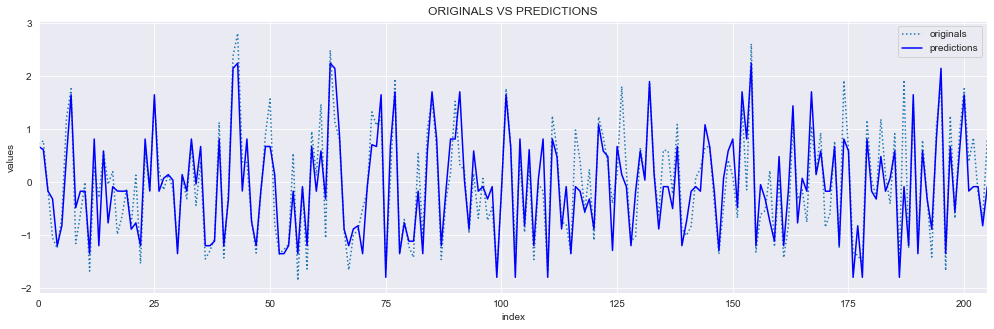

In [106]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(dtr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='b')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

Observations:

A pruned decision tree with max_depth=6, max_leaf_nodes=40 and min_samples_leaf=9 gives very good result compared to unpruned tree. And it is not overfit as well.
Still the performance of SVR stands better than decision tree. Let's analyze Feature Importance.

In [108]:
##Feature Importance
# Feature Importance
dtr_df_fi = pd.DataFrame(dtr.feature_importances_, index = concrete.columns[:-1], columns=['Importance'])
dtr_df_fi.sort_values('Importance', ascending=False)

Importance
cement             0.430
age                0.343
water              0.094
slag               0.079
coarseagg          0.021
fineagg            0.017
superplastic       0.014
ash                0.003

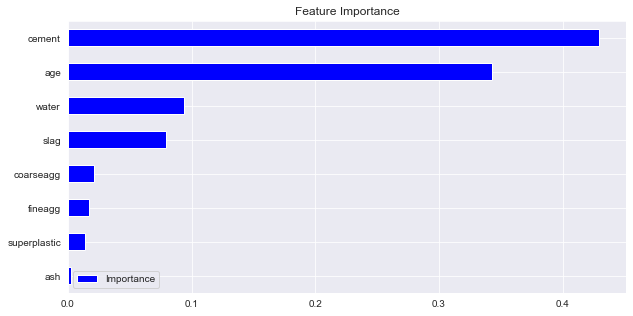

In [109]:
# Visualize the Feature Importances
dtr_df_fi.sort_values('Importance').plot(kind='barh', figsize=(10,5), color='b', title='Feature Importance')

coarseagg, superplastic, fineagg and ash features are identified to be of less important. Let's check the model performance by dropping them in Iteration 3

In [110]:
##Iteration 3 - Removing less important feature
labels = ['coarseagg', 'superplastic', 'fineagg', 'ash']
X_dtr_fi_train = X_train.drop(labels=labels, axis=1)
X_dtr_fi_test = X_test.drop(labels=labels, axis=1)
dtr_fi = DecisionTreeRegressor(max_depth=6, max_leaf_nodes=40, min_samples_leaf=9)
dtr_fi.fit(X_dtr_fi_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=40,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [111]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', dtr_fi.score(X_dtr_fi_train, y_train))
print('Testing score   :', dtr_fi.score(X_dtr_fi_test, y_test))

Training score  : 0.8341243113352492
Testing score   : 0.7544805989520712


In [112]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, dtr_fi.predict(X_dtr_fi_test))))

Root Mean Squared Error (RMSE): 0.5092230058365969


In [113]:
# Calculate Cross Validation Score
dtr_fi_cv = cross_val_score(dtr_fi, X_dtr_fi_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",dtr_fi_cv.mean())
print ("cv-std  :",dtr_fi_cv.std())
print ("cv-max  :",dtr_fi_cv.max())
print ("cv-min  :",dtr_fi_cv.min())

cv-mean : -0.3408040870887841
cv-std  : 0.16656915908399314
cv-max  : -0.11102807661879846
cv-min  : -0.8261460065974127


Observations:

Performance is dropping with removal of less important features.
Let's analyze the ensemble techniques.

Ensemble Techniques

Bagging

Random subsets are created from the original dataset (Bootstrapping).
The subset of the dataset includes all features.
A user-specified base estimator is fitted on each of these smaller sets.
Predictions from each model are combined to get the final result.

In [114]:
bag = BaggingRegressor()
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [115]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', bag.score(X_train, y_train))
print('Testing score   :', bag.score(X_test, y_test))

Training score  : 0.979015070639381
Testing score   : 0.9063059353691817


In [116]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, bag.predict(X_test))))

Root Mean Squared Error (RMSE): 0.3145727855797924


In [117]:
# Calculate Cross Validation Score
bag_cv = cross_val_score(bag, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",bag_cv.mean())
print ("cv-std  :",bag_cv.std())
print ("cv-max  :",bag_cv.max())
print ("cv-min  :",bag_cv.min())

cv-mean : -0.21005355055853464
cv-std  : 0.13578951065420977
cv-max  : -0.0443199369754409
cv-min  : -0.5897281398763351


Text(0, 0.5, 'values')

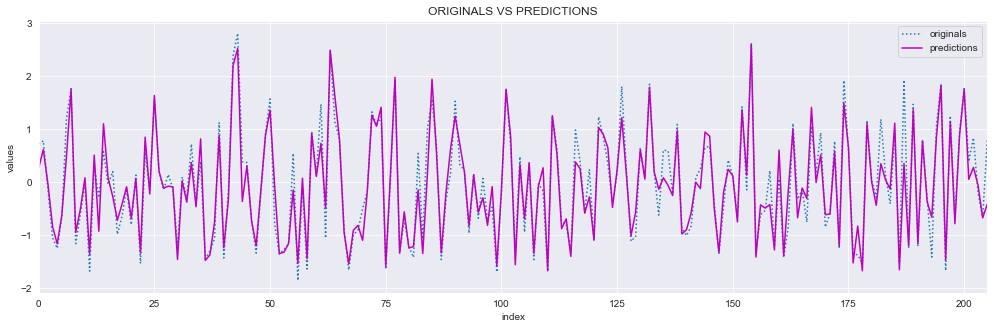

In [118]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(bag.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='m')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

Bagging with SVR as base estimator
Bagging ensembling with Support Vector Regressor as the base estomator. The accuracy score of SVR is more as compared to Decision Tree regressor, so let's check the performance of SVR as the base estimator of Bagging.

In [119]:
bag_svr = BaggingRegressor(base_estimator=SVR())
bag_svr.fit(X_train, y_train)

BaggingRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                    epsilon=0.1, gamma='scale', kernel='rbf',
                                    max_iter=-1, shrinking=True, tol=0.001,
                                    verbose=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [120]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', bag_svr.score(X_train, y_train))
print('Testing score   :', bag_svr.score(X_test, y_test))

Training score  : 0.8764038252523454
Testing score   : 0.8468103000393511


In [121]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, bag_svr.predict(X_test))))

Root Mean Squared Error (RMSE): 0.4022350309307696


In [122]:
# Calculate Cross Validation Score
bag_svr_cv = cross_val_score(bag_svr, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",bag_svr_cv.mean())
print ("cv-std  :",bag_svr_cv.std())
print ("cv-max  :",bag_svr_cv.max())
print ("cv-min  :",bag_svr_cv.min())

cv-mean : -0.2613831822124286
cv-std  : 0.14242624380428656
cv-max  : -0.07992201513397564
cv-min  : -0.6695189661902226


Text(0, 0.5, 'values')

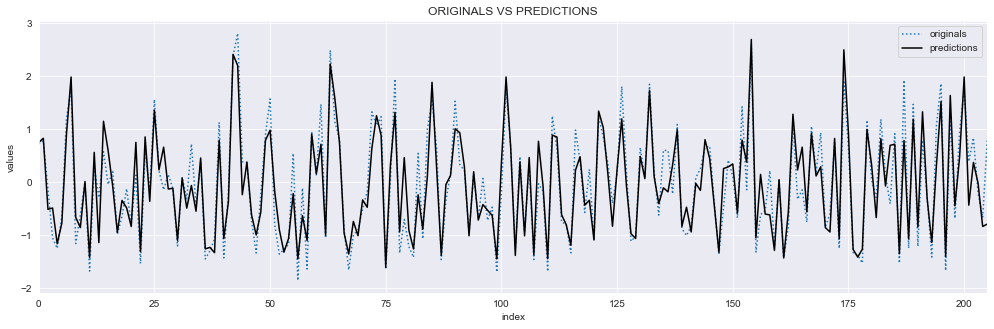

In [123]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(bag_svr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='k')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

Random Forest Regressor
Random Forest is another ensemble machine learning algorithm that follows the bagging technique. It is an extension of the bagging estimator algorithm. The base estimators in random forest are decision trees. Unlike bagging, random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.
Following are the steps of the Random Forest algorithm:

Random subsets are created from the original dataset (bootstrapping).
At each node in the decision tree, only a random set of features are considered to decide the best split.
A decision tree model is fitted on each of the subsets.
The final prediction is calculated by averaging the predictions from all decision trees.
Iteration 1

In [124]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [125]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', rfr.score(X_train, y_train))
print('Testing score   :', rfr.score(X_test, y_test))

Training score  : 0.9837170212787687
Testing score   : 0.9191067804038504


In [126]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, rfr.predict(X_test))))

Root Mean Squared Error (RMSE): 0.2922948534325402


In [127]:
# Calculate Cross Validation Score
rfr_cv = cross_val_score(rfr, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",rfr_cv.mean())
print ("cv-std  :",rfr_cv.std())
print ("cv-max  :",rfr_cv.max())
print ("cv-min  :",rfr_cv.min())

cv-mean : -0.1922068657018656
cv-std  : 0.1176822798208691
cv-max  : -0.05078171610049208
cv-min  : -0.5407554013633311


Text(0, 0.5, 'values')

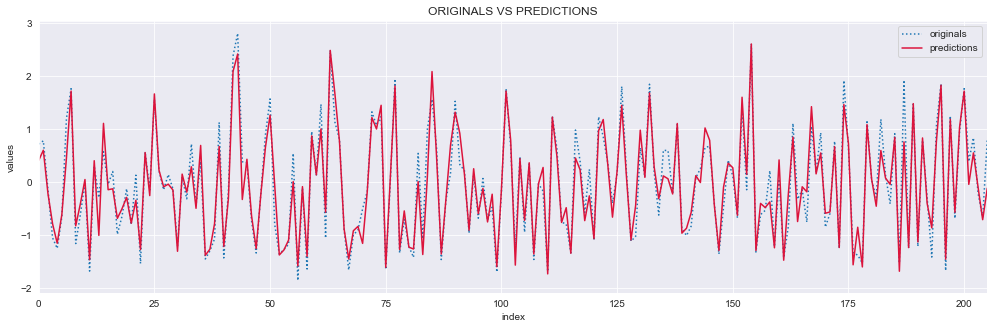

In [128]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(rfr.predict(X_test)).plot(label = "predictions",figsize=(17,5),color='crimson')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

Observations:

The accuracy of Random Forest regressor is quite impressive and it is not overfit as well.
Let's analyze the Feature Importance.

Feature Importance

In [129]:
# Feature Importance
rfr_df_fi = pd.DataFrame(rfr.feature_importances_, index = concrete.columns[:-1], columns=['Importance'])
rfr_df_fi.sort_values('Importance', ascending=False)

Importance
age                0.339
cement             0.333
water              0.101
slag               0.077
superplastic       0.066
fineagg            0.039
coarseagg          0.025
ash                0.020

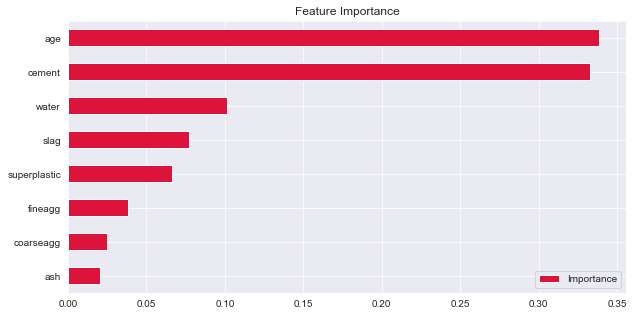

In [130]:
# Visualize the Feature Importances
rfr_df_fi.sort_values('Importance').plot(kind='barh', figsize=(10,5), color='crimson', title='Feature Importance')

superplastic, fineagg, coarseagg and ash features are identified to be of less important. Let's check the model performance by dropping them in Iteration 2
Iteration 2 - Removing less important feature

In [131]:
labels = ['superplastic', 'fineagg', 'coarseagg', 'ash']
X_rfr_fi_train = X_train.drop(labels=labels, axis=1)
X_rfr_fi_test = X_test.drop(labels=labels, axis=1)
rfr_fi = RandomForestRegressor()
rfr_fi.fit(X_rfr_fi_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [132]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', rfr_fi.score(X_rfr_fi_train, y_train))
print('Testing score   :', rfr_fi.score(X_rfr_fi_test, y_test))

Training score  : 0.9804954293207343
Testing score   : 0.9113001028254983


In [133]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, rfr_fi.predict(X_rfr_fi_test))))

Root Mean Squared Error (RMSE): 0.30607416003881627


In [134]:
# Calculate Cross Validation Score
rfr_fi_cv = cross_val_score(rfr_fi, X_rfr_fi_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",rfr_fi_cv.mean())
print ("cv-std  :",rfr_fi_cv.std())
print ("cv-max  :",rfr_fi_cv.max())
print ("cv-min  :",rfr_fi_cv.min())

cv-mean : -0.19821334013774988
cv-std  : 0.08805536855215967
cv-max  : -0.07483922398853476
cv-min  : -0.3848468066823323


Observations:

Performance is dropping with removal of less important features.

Gradient Boosting Regressor (GBM)
Gradient Boosting is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

Iteration 1

In [135]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [136]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', gbm.score(X_train, y_train))
print('Testing score   :', gbm.score(X_test, y_test))

Training score  : 0.94875450019667
Testing score   : 0.9109625083032961


In [137]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, gbm.predict(X_test))))

Root Mean Squared Error (RMSE): 0.30665607068058104


In [138]:
# Calculate Cross Validation Score
gbm_cv = cross_val_score(gbm, X_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",gbm_cv.mean())
print ("cv-std  :",gbm_cv.std())
print ("cv-max  :",gbm_cv.max())
print ("cv-min  :",gbm_cv.min())

cv-mean : -0.12366678882738584
cv-std  : 0.08410211845076158
cv-max  : -0.031169707192086765
cv-min  : -0.31026480590479566


Observations:

The accuracy of Gradient Boosting regressor is highest among all and it is not overfit as well.
Let's analyze the Feature Importance.

In [139]:
# Feature Importance
gbm_df_fi = pd.DataFrame(gbm.feature_importances_, index = concrete.columns[:-1], columns=['Importance'])
gbm_df_fi.sort_values('Importance', ascending=False)

Importance
age                0.354
cement             0.333
water              0.108
slag               0.074
superplastic       0.072
fineagg            0.037
ash                0.012
coarseagg          0.011

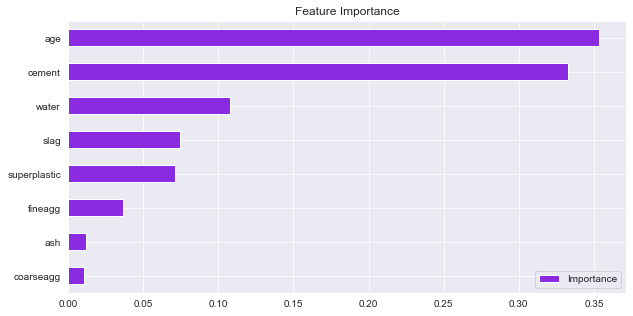

In [140]:
# Visualize the Feature Importances
gbm_df_fi.sort_values('Importance').plot(kind='barh', figsize=(10,5), color='blueviolet', title='Feature Importance')

Only ash feature is coming out to be of less important. Let's check the model performance by dropping them in Iteration 2

Iteration 2 - Removing less important feature

In [141]:
labels = ['ash']
X_gbm_fi_train = X_train.drop(labels=labels, axis=1)
X_gbm_fi_test = X_test.drop(labels=labels, axis=1)
gbm_fi = GradientBoostingRegressor()
gbm_fi.fit(X_gbm_fi_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [142]:
# Calculate the score of Decision Tree Regressor
print('Training score  :', gbm_fi.score(X_gbm_fi_train, y_train))
print('Testing score   :', gbm_fi.score(X_gbm_fi_test, y_test))

Training score  : 0.9493144168282203
Testing score   : 0.917303071466294


In [143]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, gbm_fi.predict(X_gbm_fi_test))))

Root Mean Squared Error (RMSE): 0.29553559645447647


In [144]:
# Calculate Cross Validation Score
gbm_fi_cv = cross_val_score(gbm_fi, X_gbm_fi_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",gbm_fi_cv.mean())
print ("cv-std  :",gbm_fi_cv.std())
print ("cv-max  :",gbm_fi_cv.max())
print ("cv-min  :",gbm_fi_cv.min())

cv-mean : -0.13099387601216422
cv-std  : 0.08434349691323474
cv-max  : -0.03729316901250436
cv-min  : -0.32472928246573807


Text(0, 0.5, 'values')

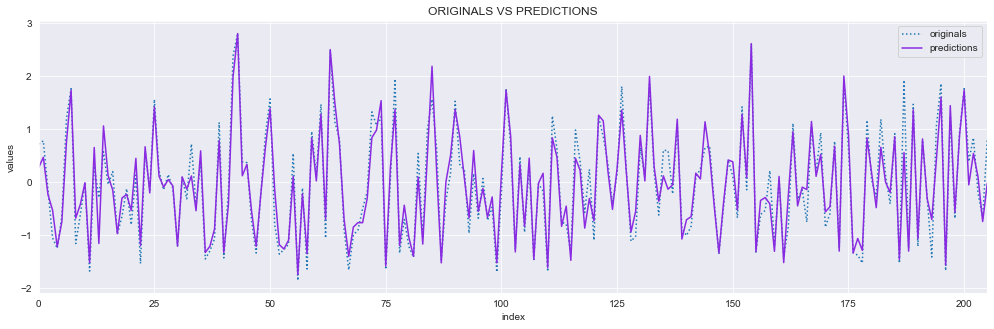

In [145]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':')
ax = pd.Series(gbm_fi.predict(X_gbm_fi_test)).plot(label = "predictions",figsize=(17,5),color='blueviolet')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

Observations:

After removing the ash feature, performance of the Gradient Boosting Regressor increased in decimals.
So, we are going to consider Gradient Boosting Regressor as our best suited model with ash emoved from feature space. Let's tune the model and check for model performance at 95% confidence level.

Deliverable - 4 (Tuning the model)
Algorithms that you think will be suitable for this project
Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit
Model performance range at 95% confidence level
As discussed earlier, Gradient Boosting Regressor is coming out to be best performing algorithm among all.So we chose this algorithm to proceed further with Model Tuning.

Hyperparameter Tuning - GridSearchCV
Let's perform the grid search using scikit-learn’s GridSearchCV which stands for grid search cross validation. By default, the GridSearchCV’s cross validation uses 3-fold KFold or StratifiedKFold depending on the situation.

In [146]:
# Run GridSearch to tune the hyper-parameter
st = time()
k_fold_cv = 5 # Stratified 10-fold cross validation
grid_params = {
    "loss":["ls", "lad"],
    "learning_rate": [0.075, 0.1, 0.15],
    "min_samples_split": np.linspace(0.1, 0.5, 5),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    "max_depth": [3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.9, 0.95, 1.0]
    }
grid = GridSearchCV(GradientBoostingRegressor(n_estimators=5), param_grid=grid_params, cv=k_fold_cv, 
                    n_jobs = 1, verbose = 0, return_train_score=True)
grid.fit(X_gbm_fi_train, y_train)
print('Best hyper parameter:', grid.best_params_)
print('Time taken %.2fs to tune the best hyper-parameter for Gradient Boosting Regressor' % (time()-st))

Best hyper parameter: {'criterion': 'mae', 'learning_rate': 0.15, 'loss': 'ls', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'subsample': 1.0}
Time taken 607.80s to tune the best hyper-parameter for Gradient Boosting Regressor


In [147]:
# Use the tuned estimator from GridSearch to run the model
gbm_grid = grid.best_estimator_
gbm_grid.fit(X_gbm_fi_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.15, loss='ls', max_depth=8,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=0.1, min_samples_split=0.2,
                          min_weight_fraction_leaf=0.0, n_estimators=5,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [148]:
# Calculate the score of Tuned Gradient Boosting Regressor
print('Training score  :', gbm_grid.score(X_gbm_fi_train, y_train))
print('Testing score   :', gbm_grid.score(X_gbm_fi_test, y_test))

Training score  : 0.4460232570876819
Testing score   : 0.4453040648845628


In [149]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, gbm_grid.predict(X_gbm_fi_test))))

Root Mean Squared Error (RMSE): 0.7654072997404784


In [150]:
# Calculate Cross Validation Score
gbm_grid_cv = cross_val_score(gbm_grid, X_gbm_fi_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",gbm_grid_cv.mean())
print ("cv-std  :",gbm_grid_cv.std())
print ("cv-max  :",gbm_grid_cv.max())
print ("cv-min  :",gbm_grid_cv.min())

cv-mean : -0.5610808103079801
cv-std  : 0.2813599088598348
cv-max  : -0.22394594355805647
cv-min  : -1.1935280805636779


Text(0, 0.5, 'values')

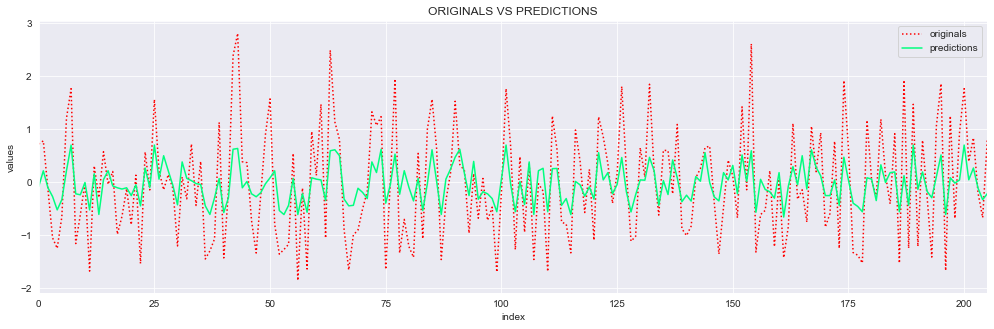

In [151]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':',color='r')
ax = pd.Series(gbm_grid.predict(X_gbm_fi_test)).plot(label = "predictions",figsize=(17,5),color='springgreen')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

In [160]:
# Use the tuned estimator from GridSearch to run the model
gbm_random = random.best_estimator_
gbm_random.fit(X_gbm_fi_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.15, loss='lad', max_depth=5,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=0.2, min_samples_split=0.1,
                          min_weight_fraction_leaf=0.0, n_estimators=5,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.95, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [154]:
# Calculate the score of Tuned Gradient Boosting Regressor
print('Training score  :', gbm_random.score(X_gbm_fi_train, y_train))
print('Testing score   :', gbm_random.score(X_gbm_fi_test, y_test))

Training score  : 0.26430871286503443
Testing score   : 0.27467295941411385


In [155]:
# Calculate RMSE
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, gbm_random.predict(X_gbm_fi_test))))

Root Mean Squared Error (RMSE): 0.8752498447255849


In [156]:
# Calculate Cross Validation Score
gbm_random_cv = cross_val_score(gbm_random, X_gbm_fi_test, y_test, cv=20, scoring='neg_mean_squared_error').ravel()
print ("cv-mean :",gbm_random_cv.mean())
print ("cv-std  :",gbm_random_cv.std())
print ("cv-max  :",gbm_random_cv.max())
print ("cv-min  :",gbm_random_cv.min())

cv-mean : -0.7284734539975604
cv-std  : 0.3642024511389817
cv-max  : -0.22862611737207075
cv-min  : -1.4879707997996372


Text(0, 0.5, 'values')

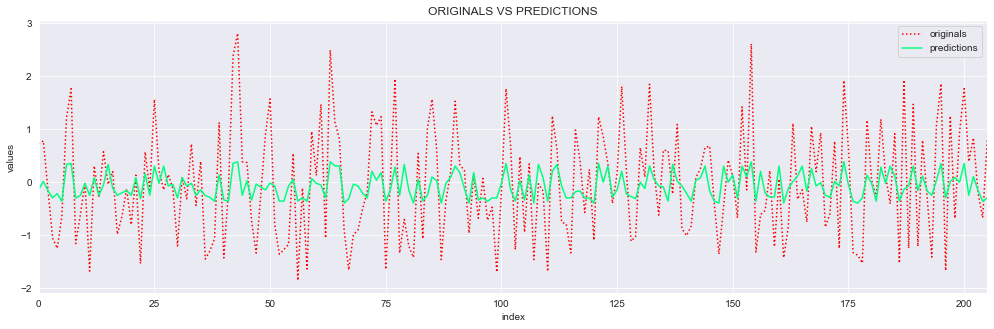

In [157]:
ax = y_test.reset_index()['strength'].plot(label="originals",figsize=(17,5), linestyle=':',color='r')
ax = pd.Series(gbm_random.predict(X_gbm_fi_test)).plot(label = "predictions",figsize=(17,5),color='springgreen')
plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")

Observations:

In both the tuning techniques, the same best hyperparameters are choosen out of search mechanism.
Let's use the best estimator from GridSearchCV further and apply resampling technique to determine accuracy in desired confidence interval

Bootstrap Sampling
The bootstrap method is a resampling technique used to estimate statistics on a population by sampling a dataset with replacement.

It can be used to estimate summary statistics such as the mean or standard deviation. It is used in applied machine learning to estimate the skill of machine learning models when making predictions on data not included in the training data.

A desirable property of the results from estimating machine learning model skill is that the estimated skill can be presented with confidence intervals, a feature not readily available with other methods such as cross-validation.

In [158]:
# Bootstrap Sampling
st = time()
values = concrete.drop('ash', axis=1).values
n_iterations = 100        # Number of bootstrap samples to create
n_size = int(len(concrete))    # size of a bootstrap sample
# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    # picking rest of the data not considered in sample
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  
    
    # fit model
    gbm_boot = grid.best_estimator_
    gbm_boot.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
    y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
    predictions = gbm_boot.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = gbm_boot.score(test[:, :-1] , y_test)
    stats.append(score)
print('Time taken %.2fs for resampling' % (time()-st))

Time taken 81.73s for resampling


With 95.0 confidence interval, Gradient Boosting's score varies between 35.4% and 49.1%


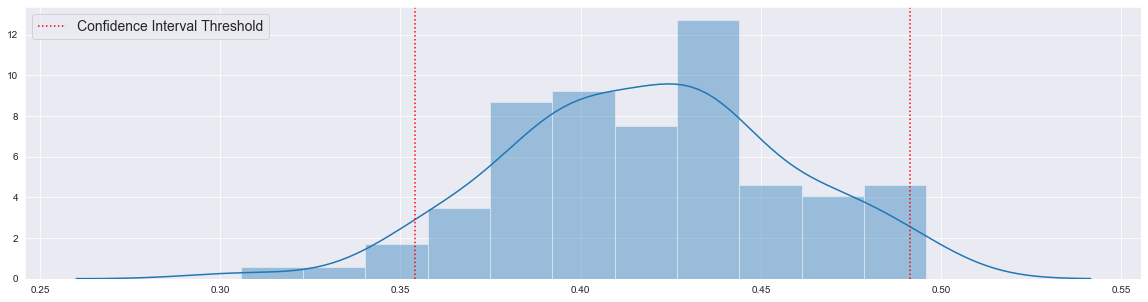

In [159]:
# Plot confidence Interval
plt.figure(figsize=(20,5))
# plt.hist(stats)
sns.distplot(stats, bins=11)
alpha = 0.95                             # for 95% confidence interval
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
plt.axvline(x=lower, color='r', linestyle=':')
plt.axvline(x=upper, color='r', linestyle=':', label='Confidence Interval Threshold')
plt.legend(loc="best",prop={"size":14})
print("With %.1f confidence interval, Gradient Boosting's score varies between %.1f%% and %.1f%%" % 
      (alpha*100, lower*100, upper*100))

Conclusion
Summing up all the observations and from the background knowledge of Civil Engineering, it is evident that:

Compressive Strength of concrete is a highly nonlinear function of age and ingredients.
Cement, water and aggregates are the basic and mandatory components of concrete whereas admixtures are optional ingredients of concrete.
Surfing and applying engineering techniques led to a successful out for PCA but not so considerable outcome for feature generation.
Gradient Boosting ensemble technique stood pretty well in predicting the compressive strength of concrete given its listed ingredients.
The model that is fined tuned with hyperparameter tuning, is able to predict with 85.9% to 91.2% accuracy with 95% confidence level.